# **Aykırı Gözlem Analizi**

### **Aykırı Değerleri Yakalamak**

In [1]:
import seaborn as sns
df = sns.load_dataset('diamonds')
df = df.select_dtypes(include = ['float64', 'int64']) #sadece sayisal degiskenler icin
df = df.dropna() #eksik gozlemlerin silinmesi
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [2]:
df_table = df["table"]
df_table.head()

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64

table isimli değişkenimizi aykırı gözlem analizi yapmak amacıyla  
box plot ile görselleştirelim.

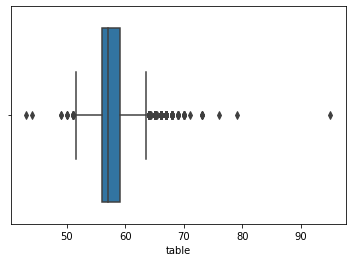

In [3]:
sns.boxplot(x = df_table);

Bir aykırı değere, aykırı değer muamelesi yapmak için bir eşik değer belirlememiz gerekiyor.  
Box plot kullanarak eşik değeri bulalım.

In [4]:
Q1 = df_table.quantile(0.25)
Q3 = df_table.quantile(0.75)
IQR = Q3-Q1 #interquartile

In [5]:
Q1

56.0

In [6]:
Q3

59.0

In [7]:
IQR

3.0

In [8]:
alt_sinir = Q1 - 1.5*IQR
ust_sinir = Q3 + 1.5*IQR

print("alt sınır: ", alt_sinir,
     "\nüst sınır: ", ust_sinir)

alt sınır:  51.5 
üst sınır:  63.5


Box plot grafiğimizin bize göstermiş olduğu değerler de bunlardı.

Aykırı değer sorgulaması yapalım.  
Alt sınırdan ya da üst sınırdan, daha aşağıda ya da daha yukarıda olan değerlere nasıl erişebileceğimize bakalım.

In [9]:
(df_table < alt_sinir) | (df_table > ust_sinir)

0        False
1        False
2         True
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [10]:
aykiri_tf = (df_table < alt_sinir) 
aykiri_tf.head()

0    False
1    False
2    False
3    False
4    False
Name: table, dtype: bool

In [11]:
df_table[aykiri_tf]
#true-false vektörlerini gönderdiğimizde true olanları getirir.

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

In [12]:
 df_table[aykiri_tf].index

Int64Index([ 1515,  3238,  3979,  4150,  5979,  7418,  8853, 11368, 22701,
            25179, 26387, 33586, 35633, 45798, 46040, 47630],
           dtype='int64')

Aykırı değerlerin index'lerine de eriştik. 

### **Aykırı Değer Problemini Çözmek**

In [13]:
df_table[aykiri_tf]

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

### Silme Yaklaşımı

In [14]:
import pandas as pd

In [15]:
type(df_table)

pandas.core.series.Series

In [16]:
#pandas df'ne çevirme işlemi
df_table = pd.DataFrame(df_table)

In [17]:
df_table.shape

(53940, 1)

**~** ifadesi, koşulu sağlamayanları al demektir.

In [18]:
t_df = df_table[~((df_table < (alt_sinir)) | (df_table > (ust_sinir))).any(axis=1)]

In [19]:
t_df.shape

(53335, 1)

Demekki table sütunumuzda 605 adet aykırı gözlem varmış.

Silme işlemini bu şekilde yapmış olduk.

### Ortalama ile Doldurma

In [20]:
import seaborn as sns
df = sns.load_dataset('diamonds')
df = df.select_dtypes(include = ['float64', 'int64'])
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [21]:
df_table = df['table']

In [22]:
aykiri_tf.head() #alt_sinir'a göre

0    False
1    False
2    False
3    False
4    False
Name: table, dtype: bool

In [23]:
df_table[aykiri_tf] #alt sınırdaki aykırı değerler.

1515     51.0
3238     50.1
3979     51.0
4150     51.0
5979     49.0
7418     50.0
8853     51.0
11368    43.0
22701    49.0
25179    50.0
26387    51.0
33586    51.0
35633    44.0
45798    51.0
46040    51.0
47630    51.0
Name: table, dtype: float64

Yakaladığımız aykırı değerleri silmek yerine ortalamaları ile değiştirmek istiyoruz.

In [24]:
df_table.mean()

57.45718390804598

In [25]:
df_table[aykiri_tf] = df_table.mean() #uyarıyı görmezden geleceğiz.

<ipython-input-25-591b9c9d92d0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_table[aykiri_tf] = df_table.mean() #uyarıyı görmezden geleceğiz.


In [26]:
df_table[aykiri_tf]

1515     57.457184
3238     57.457184
3979     57.457184
4150     57.457184
5979     57.457184
7418     57.457184
8853     57.457184
11368    57.457184
22701    57.457184
25179    57.457184
26387    57.457184
33586    57.457184
35633    57.457184
45798    57.457184
46040    57.457184
47630    57.457184
Name: table, dtype: float64

Görüldüğü üzere alt sınırdaki aykırı değerler 57.45 değeri ile değiştirildi.

### Baskılama Yöntemi

Aykırı değerler yakalandıktan sonra, aykırılar altta ise alt sınıra eşitlenir, üstte ise üst sınıra eşitlenir.

In [27]:
alt_tf = (df_table<alt_sinir)
ust_tf = (df_table>ust_sinir)

In [28]:
df_table[alt_tf] #altta kalan index'ler ve değerleri

Series([], Name: table, dtype: float64)

In [29]:
df_table[ust_tf] #üstte kalan index'ler ve değerleri

2        65.0
91       69.0
145      64.0
219      64.0
227      67.0
         ... 
53695    65.0
53697    65.0
53756    64.0
53757    64.0
53785    65.0
Name: table, Length: 589, dtype: float64

In [30]:
df_table[alt_tf] = alt_sinir
df_table[ust_tf] = ust_sinir #uyarıyı görmezden geleceğiz.

<ipython-input-30-f225b193aacf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_table[alt_tf] = alt_sinir
<ipython-input-30-f225b193aacf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_table[ust_tf] = ust_sinir #uyarıyı görmezden geleceğiz.


In [31]:
print("alt sınır: ",alt_sinir,
     "\nüst sınır: ", ust_sinir)

alt sınır:  51.5 
üst sınır:  63.5


In [32]:
df_table[alt_tf]

Series([], Name: table, dtype: float64)

In [33]:
df_table[ust_tf]

2        63.5
91       63.5
145      63.5
219      63.5
227      63.5
         ... 
53695    63.5
53697    63.5
53756    63.5
53757    63.5
53785    63.5
Name: table, Length: 589, dtype: float64

## **Çok Değişkenli Aykırı Gözlem Analizi**

### Local Outlier Factor

Gözlemleri bulundukları konumda yoğunluk tabanlı skorlayarak buna göre aykırı değer olabilecek değerleri tanımlayabilmemize imkan sağlıyor.

Bir noktanın local yoğunluğu bu noktanın komşuları ile karşılaştırılıyor. Eğer bir nokta komşularının yoğunluğundan anlamlı şekilde düşük ise bu nokta komşularından daha seyrek bir bölgede bulunuyordur yorumu yapılabiliyor. Dolayısıyla burada bir komşuluk yapısı söz konusu. Bir değerin çevresi yoğun değilse demek ki bu değer aykırı değerdir şeklinde değerlendiriliyor.

In [34]:
import seaborn as sns
diamonds = sns.load_dataset('diamonds')
diamonds = diamonds.select_dtypes(include=['float64', 'int64'])
df = diamonds.copy()
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [35]:
import sklearn

In [36]:
import numpy as np
from sklearn.neighbors import LocalOutlierFactor

In [37]:
clf = LocalOutlierFactor(n_neighbors = 20, contamination = 0.1)

In [38]:
clf.fit_predict(df)

array([-1, -1, -1, ...,  1,  1,  1])

In [39]:
df_scores = clf.negative_outlier_factor_

In [40]:
df_scores[0:10]

array([-1.58352526, -1.59732899, -1.62278873, -1.33002541, -1.30712521,
       -1.28408436, -1.28428162, -1.26458706, -1.28422952, -1.27351342])

In [41]:
np.sort(df_scores)[0:20]

array([-8.60430658, -8.20889984, -5.86084355, -4.98415175, -4.81502092,
       -4.81502092, -4.61522833, -4.37081214, -4.29842288, -4.10492387,
       -4.0566648 , -4.01831733, -3.94882806, -3.82378797, -3.80135297,
       -3.75680919, -3.65947378, -3.59249261, -3.55564138, -3.47157375])

Şimdi bu score'lar arasından bir eşik değer belirleyeceğiz, bu score'un altında kalan değerler aykırı değer olarak tanımlanacak.

In [42]:
np.sort(df_scores)[13] #13. degere gidelim

-3.823787967755565

Bu değeri eşik değer kabul edeceğiz. (rastgele seçtik.)

In [43]:
esik_deger = np.sort(df_scores)[13]

In [44]:
aykiri_tf = df_scores > esik_deger #aykırı olmayanlar
aykiri_tf

array([ True,  True,  True, ...,  True,  True,  True])

### Silme yöntemi

In [45]:
yeni_df = df[df_scores > esik_deger]
yeni_df

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


yeni_df ile aykırı olmayan değerlere eriştik. Aykırı değerleri sildik anlamına geliyor.  
Şu anda yeni_df ile gözlemlediğimiz tüm değerler, **aykırı olmayan** değerler.

**Aykırı değerlere erişmek istersek;**

In [46]:
df[df_scores < esik_deger].head()

,carat,depth,table,price,x,y,z
6341,1.00,44.0,53.0,4032,6.31,6.24,4.12
10377,1.09,43.0,54.0,4778,6.53,6.55,4.12
24067,2.00,58.9,57.0,12210,8.09,58.90,8.06
35633,0.29,62.8,44.0,474,4.20,4.24,2.65
36503,0.30,51.0,67.0,945,4.67,4.62,2.37


### Baskılama Yöntemi

In [47]:
df[df_scores == esik_deger]

,carat,depth,table,price,x,y,z
31230,0.45,68.6,57.0,756,4.73,4.5,3.19


Aykırı gözlemler yerine yukarıda gördüğümüz eşik değeri atayabiliriz.

In [48]:
baski_deger = df[df_scores == esik_deger]

In [49]:
aykirilar = df[~aykiri_tf]

Elimizdeki mevcut aykırıların yerine, eşik değerdeki değerleri atayacak olduğumuzdan dolayı bazı index problemleri ortaya çıkıyor.  
Bu index problemlerini giderebilmek adına bir kaç işlem yapacağız.

aykirilar df'ini indexsiz bir array'e çevireceğiz.  
Sonrasında baski_deger'i de arraysizleştirip, atama işlemi gerçekleştireceğiz.  
Son basamakta da aykırı değerleri baskı değer ile değiştirmiş olacağız.

In [50]:
res = aykirilar.to_records(index = False)
#index'lerden kurtulduk sadece degerleri kaldi.
res

rec.array([(1.  , 44. , 53. ,  4032, 6.31,  6.24,  4.12),
           (1.09, 43. , 54. ,  4778, 6.53,  6.55,  4.12),
           (2.  , 58.9, 57. , 12210, 8.09, 58.9 ,  8.06),
           (0.45, 68.6, 57. ,   756, 4.73,  4.5 ,  3.19),
           (0.29, 62.8, 44. ,   474, 4.2 ,  4.24,  2.65),
           (0.3 , 51. , 67. ,   945, 4.67,  4.62,  2.37),
           (0.73, 70.8, 55. ,  1049, 5.51,  5.34,  3.84),
           (1.03, 78.2, 54. ,  1262, 5.72,  5.59,  4.42),
           (0.7 , 71.6, 55. ,  1696, 5.47,  5.28,  3.85),
           (0.51, 61.8, 54.7,  1970, 5.12,  5.15, 31.8 ),
           (0.51, 61.8, 55. ,  2075, 5.15, 31.8 ,  5.12),
           (0.81, 68.8, 79. ,  2301, 5.26,  5.2 ,  3.58),
           (0.5 , 79. , 73. ,  2579, 5.21,  5.18,  4.09),
           (0.5 , 79. , 73. ,  2579, 5.21,  5.18,  4.09)],
          dtype=[('carat', '<f8'), ('depth', '<f8'), ('table', '<f8'), ('price', '<i8'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8')])

Oluşturduğumus res'lerin yerine baskı değeri atayalım;  
(Tüm aykırıların yerine eşik değerimiz)

In [51]:
res[:] = baski_deger.to_records(index = False)
res

rec.array([(0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19)],
          dtype=[('carat', '<f8'), ('depth', '<f8'), ('table', '<f8'), ('price', '<i8'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8')])

Bu array'i bizim gerçek DataFrame'imizdeki aykırı değerlerin yerine yerleştirmemiz gerekiyor.

In [52]:
df[~aykiri_tf] = pd.DataFrame(res, index = df[~aykiri_tf].index)

In [53]:
df[~aykiri_tf]

,carat,depth,table,price,x,y,z
6341,0.45,68.6,57.0,756,4.73,4.5,3.19
10377,0.45,68.6,57.0,756,4.73,4.5,3.19
24067,0.45,68.6,57.0,756,4.73,4.5,3.19
31230,0.45,68.6,57.0,756,4.73,4.5,3.19
35633,0.45,68.6,57.0,756,4.73,4.5,3.19
36503,0.45,68.6,57.0,756,4.73,4.5,3.19
38840,0.45,68.6,57.0,756,4.73,4.5,3.19
41918,0.45,68.6,57.0,756,4.73,4.5,3.19
45688,0.45,68.6,57.0,756,4.73,4.5,3.19
48410,0.45,68.6,57.0,756,4.73,4.5,3.19


Başarılı bir şekilde orjinal veri setimizin içerisindeki aykırı değerler yerine eşik değerleri/baskılayıcıları yerleştirdik.

## **Eksik Veri Analizi (Missing Data Analysis)**

### Hızlı Çözüm

In [54]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3}        
)

df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [55]:
df.isnull().sum() #her değişkendeki null değer sayısı

V1    2
V2    3
V3    2
dtype: int64

In [56]:
df.notnull().sum() #her değişkendeki null olmayan değer sayısı

V1    7
V2    6
V3    7
dtype: int64

In [57]:
df.isnull().sum().sum() #dataset'teki toplam null değer sayısı

7

In [58]:
#en az 1 tane null değer içeren gözlemler
df[df.isnull().any(axis=1)]

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
3,NaN,8.0,6.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN


In [59]:
#hepsi dolu olan gözlemler
df[df.notnull().all(axis=1)]

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [60]:
#hepsi dolu olan gözlemler, farklı yoldan
df[df["V1"].notnull() & df["V2"].notnull() & df["V3"].notnull()]

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


#### Eksik Değerlerin Direk Silinmesi

In [61]:
df.dropna()

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


**dropna()** , bir gözlem biriminde sadece bir tane bile null değer varsa o gözlem birimini siler(geçici olarak).  
Kalıcı olarak etkilemesi için **dropna(inplace = True)** parametresini eklememiz gerekir.

In [62]:
df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [63]:
df.dropna(inplace = True)

In [64]:
df

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


#### Basit Değer Atama

In [65]:
df["V1"]

2     6.0
4     7.0
7     9.0
8    15.0
Name: V1, dtype: float64

In [66]:
df["V1"].mean()

9.25

Değişkenin eksik verilerini istediğimiz bir şey ile doldurmak için **fillna()** kullanırız.  
Fonksiyonda parantezler içerisine yazılan değer ile eksik değerler doldurulacaktır. (Geçici olarak)

In [67]:
df["V1"].fillna(df["V1"].mean())

2     6.0
4     7.0
7     9.0
8    15.0
Name: V1, dtype: float64

Elimizde 10 tane değişken olduğunu düşünelim, hepsi için eksik değerleri ortalama değerleri ile dolduracağız. Bunu nasıl yaparız?

In [68]:
df.apply(lambda x: x.fillna(x.mean()), axis=0)

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


### **Eksik Değerlerin Saptanması** Özet

In [69]:
#değişkenlerdeki tam değer sayısı
df.notnull().sum()

V1    4
V2    4
V3    4
dtype: int64

In [70]:
#değişkenlerdeki eksik değer sayısı
df.isnull().sum()

V1    0
V2    0
V3    0
dtype: int64

In [71]:
#veri setindeki toplam eksik değer sayısı
df.isnull().sum().sum()

0

In [72]:
#en az bir eksik değere sahip gözlemler
df[df.isnull().any(axis=1)]

,V1,V2,V3


In [73]:
#tüm değerleri tam olan gözlemler
df[df.notnull().all(axis=1)]

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


### Eksik Veri Yapısının Görselleştirilmesi

Eksik verilerin incelenmeden direk olarak silinmesinin veya doldurulmasının bazı problemlere sebep olabileceğinden bahsetmiştik.

In [75]:
import missingno as msno

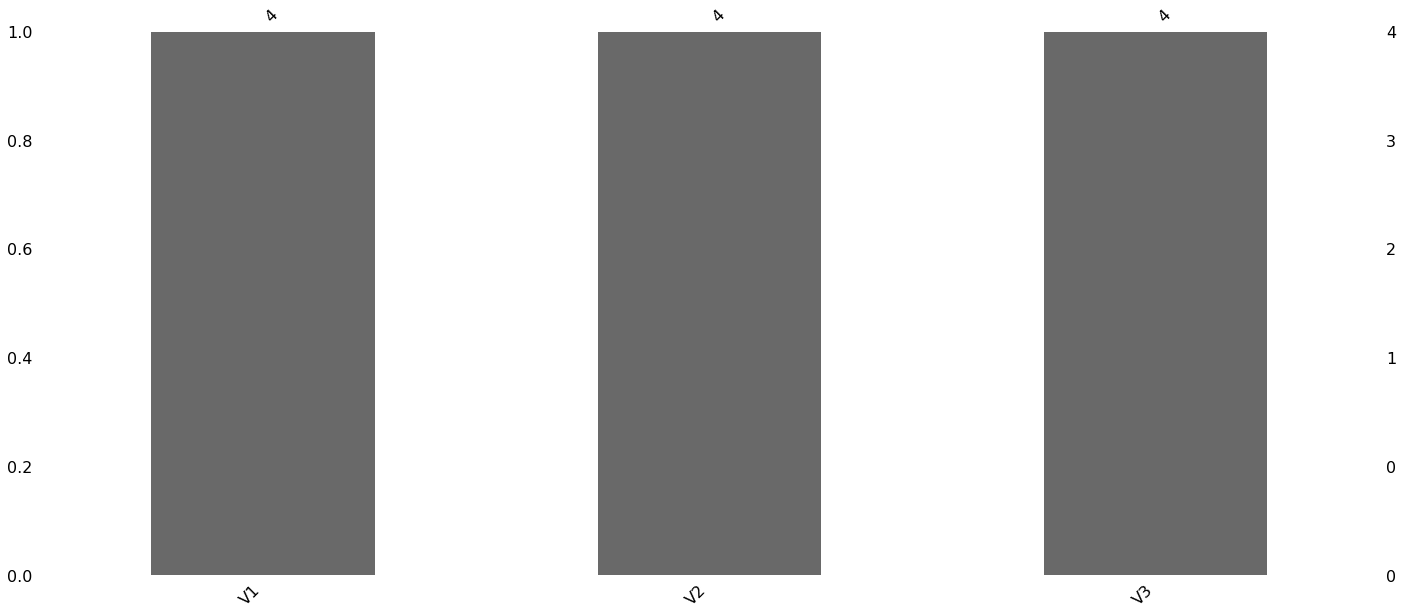

In [76]:
msno.bar(df);

Sol eksen: Eksikliklerin yüzdesini ya da tam olmanın yüzdesini ifade eder.  
Sağ eksen: Elimizdeki veri setindeki gözlem sayısını ifade eder.  
Yukarıdaki rakamlar ise her değişkende kaç adet tam dolu gözlem olduğunu ifade eder.

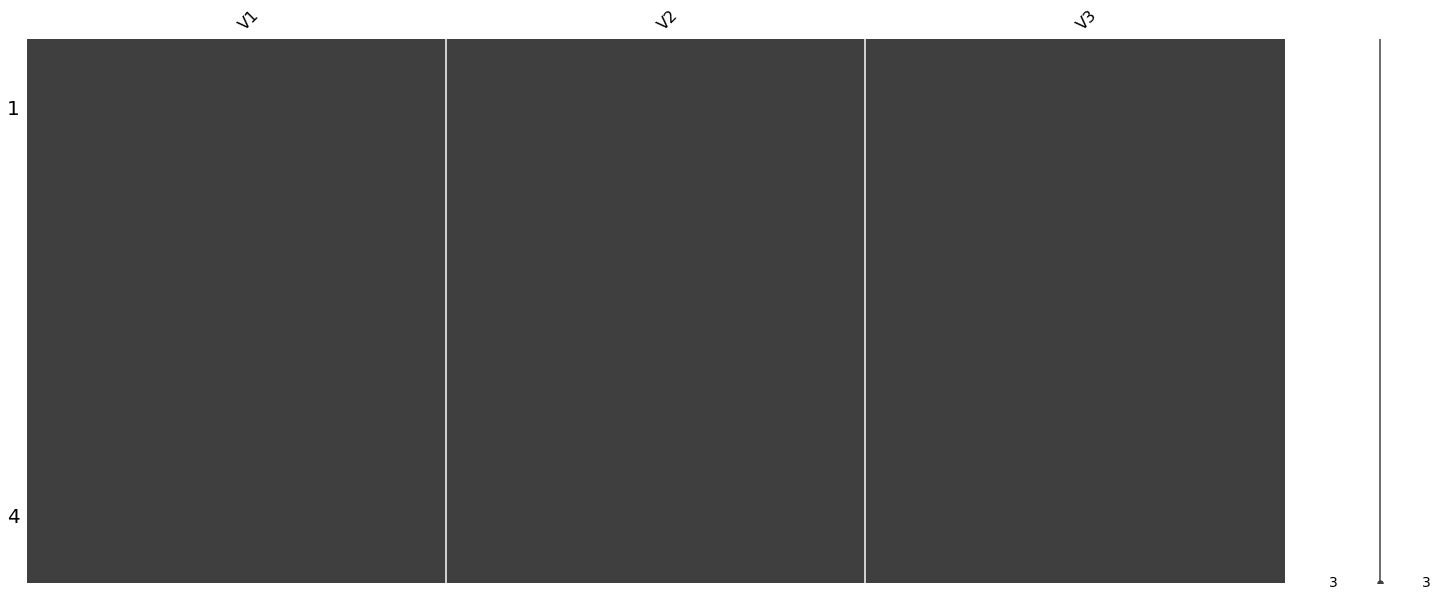

In [77]:
msno.matrix(df);

Eksik değerlerin rassallığı ile ilgili gerekli yapısal bozuklukları yakalayabilme imkanı veren bir görsel.

Sol eksen: Gözlem birimleri (1-2-3-4-5-6-7-8-9) gibi.  
Sağ eksen: Aynı anda dolu olan/boş olan değerler.

**Planets** veri seti üzerinde msno.matrix() grafiğini inceleyelim.

In [78]:
import seaborn as sns
df = sns.load_dataset('planets')
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [79]:
df.isnull().sum()

method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

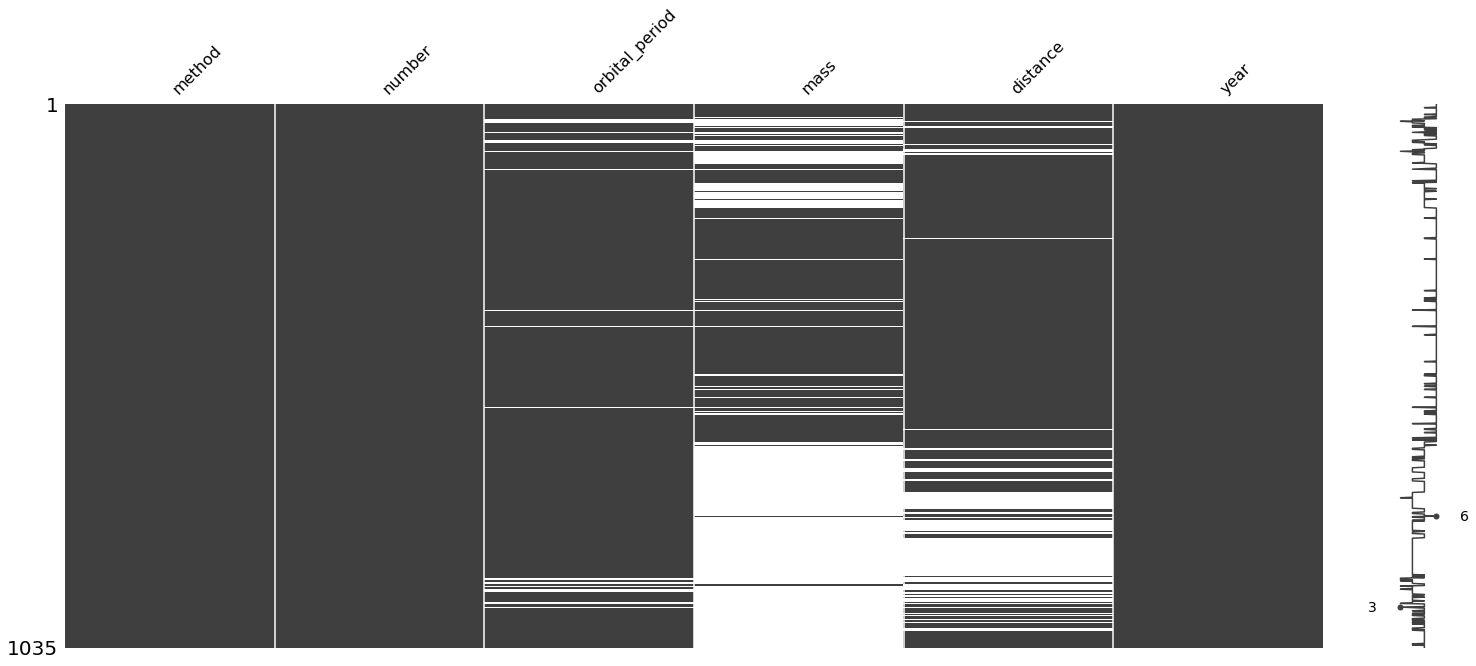

In [80]:
msno.matrix(df);

orbital_period'da her eksiklik olduğunda mass değişkeninde de eksik gözlem oluşmuş.  
mass değişkenindeki eksikliklerin bazıları, orbital_period değişkenine bağlı olarak gerçekleşmiş.

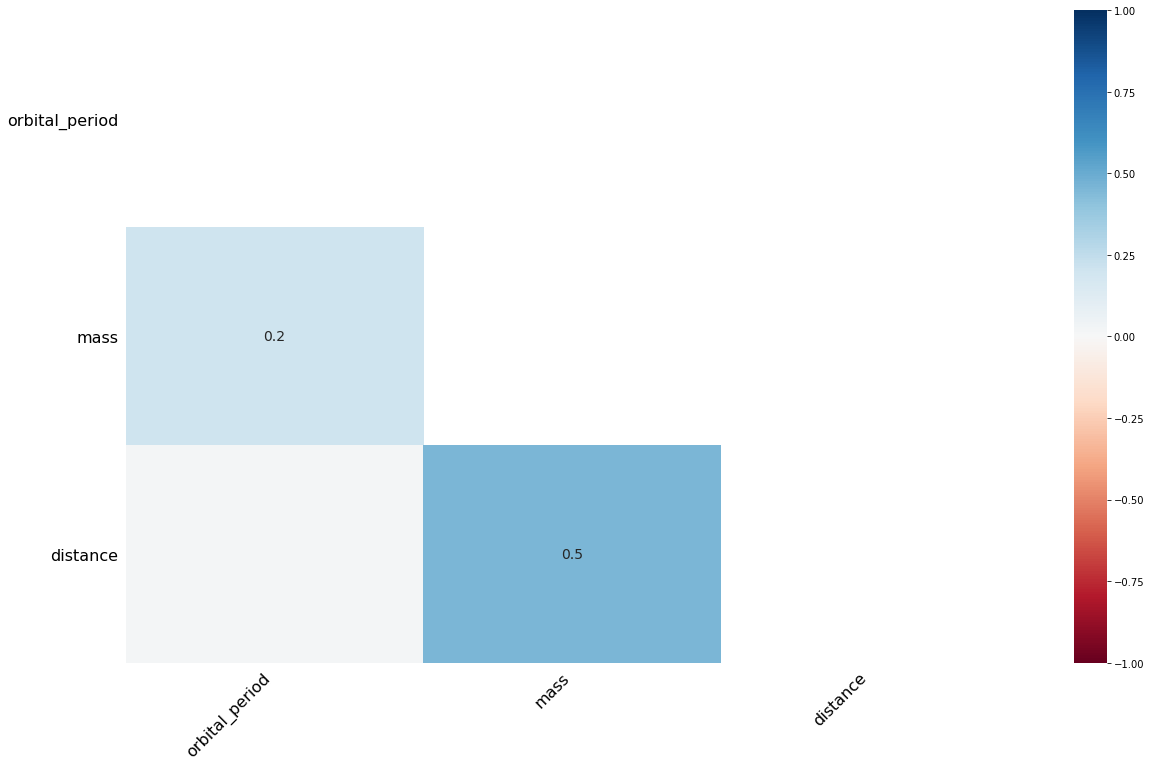

In [81]:
msno.heatmap(df);

msno.heatmap() bize değişkenler arasındaki **nullity correlation** değerlerini gösterir.  
Örneğin mass ile distance arasındaki nullity correlation değeri 0.5 çıkmış, bu demek oluyor ki bu iki değişkenden birinde eksiklik gözlemliyorsanız diğerinde de eksiklik gözlemleme ihtimaliniz yüksektir.

Yapısal olarak da, nümerik bir karşılık olarak da gözlemliyoruz ki bu veri seti rassal bir eksikliğe sahip değildir. Burada direk doldurma yada direk silme gibi işlemleri yapmak bir takım problemleri de beraberinde getirecektir.  
Bu işlemler yapılacaksa, veri setindeki değişkenlerin birbirine olan bağımlılığı mutlaka göz önünde bulundurulmalıdır!

### Silme Yöntemleri

In [82]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])

df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3}        
)

df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


**En az 1 eksik değişkene sahip tüm gözlemlerin silinmesi:**

In [83]:
df.dropna() #orjinali bozulmaz

,V1,V2,V3
2,6.0,5.0,5.0
4,7.0,12.0,14.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [84]:
 df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


**Tüm gözlem değerleri aynı anda NaN olan gözlemleri ele alalım:** (Örn; 6. gözlem)

In [85]:
df.dropna(how = "all")

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
7,9.0,2.0,2.0
8,15.0,3.0,31.0


In [86]:
df.dropna(axis = 1, how = "all")
#tüm değerleri NaN olan değişkeni siler (bizde yok)

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


### Basit Değer Atama Yöntemleri
#### Sayısal Değişkenlerde Atama

In [87]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])

df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3}        
)

df

,V1,V2,V3
0,1.0,7.0,NaN
1,3.0,NaN,12.0
2,6.0,5.0,5.0
3,NaN,8.0,6.0
4,7.0,12.0,14.0
5,1.0,NaN,7.0
6,NaN,NaN,NaN
7,9.0,2.0,2.0
8,15.0,3.0,31.0


**NaN değerleri değişkenin ortalaması ile doldurma:**

In [88]:
df.mean()

V1     6.000000
V2     6.166667
V3    11.000000
dtype: float64

In [89]:
df.fillna(df.mean())

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


Aynı işlemi **apply** ve **lambda** kullanarak yapalım;

In [90]:
df.apply(lambda x: x.fillna(x.mean()),axis = 0)

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


İstediğimiz değişkenleri ortalamasıyla, istediğimizi medyanıyla doldurabiliriz;

In [91]:
df.fillna(df.mean()["V1":"V2"])

,V1,V2,V3
0,1.0,7.000000,NaN
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,NaN
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


In [92]:
df["V3"].fillna(df["V3"].median())

0     7.0
1    12.0
2     5.0
3     6.0
4    14.0
5     7.0
6     7.0
7     2.0
8    31.0
Name: V3, dtype: float64

**where** ve **notna** kullanarak değer atama;

In [93]:
df.where(pd.notna(df), df.mean(), axis = 'columns')

,V1,V2,V3
0,1.0,7.000000,11.0
1,3.0,6.166667,12.0
2,6.0,5.000000,5.0
3,6.0,8.000000,6.0
4,7.0,12.000000,14.0
5,1.0,6.166667,7.0
6,6.0,6.166667,11.0
7,9.0,2.000000,2.0
8,15.0,3.000000,31.0


### Kategorik Değişken Kırılımında Değer Atama

Eğer elimizde, eksikliğini doldurmak üzere bir değişken varsa öncelikle bu değişkeni, kategorik başka değişkenlerce indirgeyebiliyor muyuz? buna bir bakmak lazım.  
Yani örneğin, arge departmanına çalışan kişilerin ortalama maaşını atamak da pazarlama departmanının maaş ortalamasını atamak da şirketin tüm maaşlarının ortalamasını atamakdan daha başarılı olacaktır.  
Hatta uzmanlık seviyesini de bir kırılım daha olarak eklersek eğer, çok çok daha doğru bir eksik veri doldurma işlemi yapmış oluruz.

In [94]:
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])
V2 = np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 = np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
V4 = np.array(["IT", "IT", "IK", "IT", "IK", "IK", "IK", "IT", "IT"])

df = pd.DataFrame(
        {"maas": V1,
         "V2" : V2,
         "V3" : V3,
         "departman" : V4}
        )

df

,maas,V2,V3,departman
0,1.0,7.0,NaN,IT
1,3.0,NaN,12.0,IT
2,6.0,5.0,5.0,IK
3,NaN,8.0,6.0,IT
4,7.0,12.0,14.0,IK
5,1.0,NaN,7.0,IK
6,NaN,NaN,NaN,IK
7,9.0,2.0,2.0,IT
8,15.0,3.0,31.0,IT


In [95]:
#Departmanlara göre gruplayarak ortalama maaşları görelim;
df.groupby("departman")["maas"].mean()

departman
IK    4.666667
IT    7.000000
Name: maas, dtype: float64

In [96]:
df["maas"].fillna(df.groupby("departman")["maas"].transform("mean"))

0     1.000000
1     3.000000
2     6.000000
3     7.000000
4     7.000000
5     1.000000
6     4.666667
7     9.000000
8    15.000000
Name: maas, dtype: float64

Maaş değişkeninin eksikliklerini, departmanların maaş ortalamalarını göz önünde bulundurarak doldurduk.

### Kategorik Değişkenler için Eksik Değer Atama

In [97]:
V1 = np.array([1,3,6,np.NaN,7,1,np.NaN,9,15])

V4 = np.array(["IT", np.NaN, "IK", "IT", "IK", "IK", "IK", "IT", "IT"], dtype=object)

df = pd.DataFrame(
        {"maas": V1,
         "departman" : V4}
        )
df

,maas,departman
0,1.0,IT
1,3.0,NaN
2,6.0,IK
3,NaN,IT
4,7.0,IK
5,1.0,IK
6,NaN,IK
7,9.0,IT
8,15.0,IT


Kategorik değişkenlerde eksik verileri doldururken en çok kullanılan yöntemlerden biri **mod** yöntemidir.  
Eksik değer, en sık tekrar eden değer ile doldurulur.  

In [102]:
df["departman"].mode()

0    IK
1    IT
dtype: object

In [98]:
df["departman"].fillna(df["departman"].mode()[0])
#inplace argumani kullanilmadigi icin kalici degil.

0    IT
1    IK
2    IK
3    IT
4    IK
5    IK
6    IK
7    IT
8    IT
Name: departman, dtype: object

1 indexli eksik degeri 'IK' ile doldurduk.

Bazı durumlarda mod ile doldurmak yerine, eksik değerin öncesindeki ya da sonrasındaki değer ile doldurmak isteyebiliriz.

**Sonrasındaki değer ile doldurma:**

In [103]:
df["departman"].fillna(method = "bfill")

0    IT
1    IK
2    IK
3    IT
4    IK
5    IK
6    IK
7    IT
8    IT
Name: departman, dtype: object

**Öncesindeki değer ile doldurma:**

In [104]:
df["departman"].fillna(method = "ffill")

0    IT
1    IT
2    IK
3    IT
4    IK
5    IK
6    IK
7    IT
8    IT
Name: departman, dtype: object

### **Tahmine Dayalı Değer Atama Yöntemleri - KNN & Random Forest & EM**

Önceki bölümlerde eksik değerleri ya sildik ya da ortalama, medyan, mod gibi basit değerler ile doldurduk.  
Bunların ötesinde, makine öğrenmesi algoritmalarını kullanarak eksik değerleri doldurma işlemlerini gerçekleştirebiliriz.

#### **KNN**

In [109]:
import seaborn as sns
import missingno as msno

df = sns.load_dataset('titanic')
df = df.select_dtypes(include = ['float64', 'int64'])
print(df.head())
df.isnull().sum()

   survived  pclass   age  sibsp  parch     fare
0         0       3  22.0      1      0   7.2500
1         1       1  38.0      1      0  71.2833
2         1       3  26.0      0      0   7.9250
3         1       1  35.0      1      0  53.1000
4         0       3  35.0      0      0   8.0500


survived      0
pclass        0
age         177
sibsp         0
parch         0
fare          0
dtype: int64

In [111]:
from ycimpute.imputer import knnimput

knnimput kullanırken değişken isimlerimiz silineceğinden dolayı onları ayrı bir değişkene atamamız gerekiyor.

In [113]:
var_names = list(df)
var_names

['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']

knnimput'u numpy array'leri ile kullanabiliyoruz. df'yi np array'ine çevirelim;

In [119]:
n_df = np.array(df)

In [121]:
n_df[:10]

array([[ 0.    ,  3.    , 22.    ,  1.    ,  0.    ,  7.25  ],
       [ 1.    ,  1.    , 38.    ,  1.    ,  0.    , 71.2833],
       [ 1.    ,  3.    , 26.    ,  0.    ,  0.    ,  7.925 ],
       [ 1.    ,  1.    , 35.    ,  1.    ,  0.    , 53.1   ],
       [ 0.    ,  3.    , 35.    ,  0.    ,  0.    ,  8.05  ],
       [ 0.    ,  3.    ,     nan,  0.    ,  0.    ,  8.4583],
       [ 0.    ,  1.    , 54.    ,  0.    ,  0.    , 51.8625],
       [ 0.    ,  3.    ,  2.    ,  3.    ,  1.    , 21.075 ],
       [ 1.    ,  3.    , 27.    ,  0.    ,  2.    , 11.1333],
       [ 1.    ,  2.    , 14.    ,  1.    ,  0.    , 30.0708]])

In [122]:
dff = knnimput.KNN(k=4).complete(n_df)

Imputing row 1/891 with 0 missing, elapsed time: 0.521
Imputing row 101/891 with 0 missing, elapsed time: 0.522
Imputing row 201/891 with 0 missing, elapsed time: 0.523
Imputing row 301/891 with 1 missing, elapsed time: 0.524
Imputing row 401/891 with 0 missing, elapsed time: 0.525
Imputing row 501/891 with 0 missing, elapsed time: 0.525
Imputing row 601/891 with 0 missing, elapsed time: 0.526
Imputing row 701/891 with 0 missing, elapsed time: 0.527
Imputing row 801/891 with 0 missing, elapsed time: 0.527


np array'e çevirdiğimi df'i tekrar dataframe yapalım;

In [123]:
dff = pd.DataFrame(dff, columns = var_names)

In [127]:
dff.isnull().sum()

survived    0
pclass      0
age         0
sibsp       0
parch       0
fare        0
dtype: int64

Gördüğümüz gibi, eksik değerleri KNN algoritması ile doldurduk.

#### **Random Forests**

Yine aynı dataframe üzerinde işlem yapacağız.

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns

df = sns.load_dataset('titanic')
df = df.select_dtypes(include = ['float64', 'int64'])
print(df.head())
df.isnull().sum()

   survived  pclass   age  sibsp  parch     fare
0         0       3  22.0      1      0   7.2500
1         1       1  38.0      1      0  71.2833
2         1       3  26.0      0      0   7.9250
3         1       1  35.0      1      0  53.1000
4         0       3  35.0      0      0   8.0500


survived      0
pclass        0
age         177
sibsp         0
parch         0
fare          0
dtype: int64

In [5]:
var_names = list(df)

In [6]:
n_df = np.array(df)

In [7]:
from ycimpute.imputer import iterforest

In [11]:
dff = iterforest.IterImput().complete(n_df)

AttributeError: module 'ycimpute.imputer.iterforest' has no attribute 'IterImput'

In [10]:
dff = pd.DataFrame(dff, columns = var_names)

NameError: name 'dff' is not defined

In [9]:
dff.isnull().sum()

NameError: name 'dff' is not defined

#### **EM**

In [12]:
df = sns.load_dataset('titanic')
df = df.select_dtypes(include = ['float64', 'int64'])
print(df.head())
df.isnull().sum()

   survived  pclass   age  sibsp  parch     fare
0         0       3  22.0      1      0   7.2500
1         1       1  38.0      1      0  71.2833
2         1       3  26.0      0      0   7.9250
3         1       1  35.0      1      0  53.1000
4         0       3  35.0      0      0   8.0500


survived      0
pclass        0
age         177
sibsp         0
parch         0
fare          0
dtype: int64

In [13]:
from ycimpute.imputer import EM

In [14]:
var_names = list(df)

In [15]:
n_df = np.array(df)

In [16]:
dff = EM().complete(n_df)

In [17]:
dff = pd.DataFrame(dff, columns = var_names)

In [22]:
dff.isnull().sum()

survived    0
pclass      0
age         0
sibsp       0
parch       0
fare        0
dtype: int64

# Değişken Standardizasyonu (Veri Standardizasyonu)

In [1]:
import numpy as np
import pandas as pd

V1 = np.array([1,3,6,5,7])
V2 = np.array([7,7,5,8,12])
V3 = np.array([6,12,5,6,14])

df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3})

df = df.astype(float)
df

,V1,V2,V3
0,1.0,7.0,6.0
1,3.0,7.0,12.0
2,6.0,5.0,5.0
3,5.0,8.0,6.0
4,7.0,12.0,14.0


#### **Standardizasyon**

In [2]:
from sklearn import preprocessing

In [6]:
preprocessing.scale(df)

array([[-1.57841037, -0.34554737, -0.70920814],
       [-0.64993368, -0.34554737,  0.92742603],
       [ 0.74278135, -1.2094158 , -0.98198051],
       [ 0.27854301,  0.08638684, -0.70920814],
       [ 1.2070197 ,  1.81412369,  1.47297076]])

In [4]:
df.mean()

V1    4.4
V2    7.8
V3    8.6
dtype: float64

#### **Normalizasyon**

In [7]:
preprocessing.normalize(df)

array([[0.10783277, 0.75482941, 0.64699664],
       [0.21107926, 0.49251828, 0.84431705],
       [0.64699664, 0.53916387, 0.53916387],
       [0.4472136 , 0.71554175, 0.53665631],
       [0.35491409, 0.60842415, 0.70982818]])

#### **Min-Max Dönüşümü**

In [8]:
scaler = preprocessing.MinMaxScaler(feature_range = (10, 20))

In [9]:
scaler.fit_transform(df)

array([[10.        , 12.85714286, 11.11111111],
       [13.33333333, 12.85714286, 17.77777778],
       [18.33333333, 10.        , 10.        ],
       [16.66666667, 14.28571429, 11.11111111],
       [20.        , 20.        , 20.        ]])

## Değişken Dönüşümleri

In [1]:
import seaborn as sns
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#### **0-1 Dönüşümü**

**sex** değişkeninin 1 ve 0 değerlerine dönüştüreceğiz. Bu dönüşüm **LabelEncoder** isimli bir fonksiyon ile yapılıyor, bu dünyadaki en sık kullanılan dönüşümlerden birisidir.

In [2]:
from sklearn.preprocessing import LabelEncoder

In [3]:
lbe = LabelEncoder()

In [4]:
lbe.fit_transform(df["sex"])

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0])

In [5]:
df["yeni_sex"] = lbe.fit_transform(df["sex"])

In [6]:
df

,total_bill,tip,sex,smoker,day,time,size,yeni_sex
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,1
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0
241,22.67,2.00,Male,Yes,Sat,Dinner,2,1
242,17.82,1.75,Male,No,Sat,Dinner,2,1


#### **"1 ve Diğerleri (0)" Dönüşümü**

In [8]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,yeni_sex
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0


In [9]:
import numpy as np
df["yeni_day"] = np.where(df["day"].str.contains("Sun"), 1, 0)
df

,total_bill,tip,sex,smoker,day,time,size,yeni_sex,yeni_day
0,16.99,1.01,Female,No,Sun,Dinner,2,0,1
1,10.34,1.66,Male,No,Sun,Dinner,3,1,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0,1
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,1,0
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0,0
241,22.67,2.00,Male,Yes,Sat,Dinner,2,1,0
242,17.82,1.75,Male,No,Sat,Dinner,2,1,0


#### **Çok Sınıflı Dönüşüm**

In [10]:
from sklearn.preprocessing import LabelEncoder
lbe = LabelEncoder()

In [11]:
lbe.fit_transform(df["day"])

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 3])

## **One-Hot Dönüşümü ve Dummy Değişken Tuzağı**

In [12]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,yeni_sex,yeni_day
0,16.99,1.01,Female,No,Sun,Dinner,2,0,1
1,10.34,1.66,Male,No,Sun,Dinner,3,1,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0,1


In [14]:
import pandas as pd
#pandas ile one-hot dönüşümü yapalım;
df_one_hot = pd.get_dummies(df, columns=["sex"], prefix=["sex"])
#prefix = oluşturulacak olan değişkenlerin ön isimlendirmesinin ne olacağını ifade eder.

In [15]:
df_one_hot.head()

,total_bill,tip,smoker,day,time,size,yeni_sex,yeni_day,sex_Male,sex_Female
0,16.99,1.01,No,Sun,Dinner,2,0,1,0,1
1,10.34,1.66,No,Sun,Dinner,3,1,1,1,0
2,21.01,3.50,No,Sun,Dinner,3,1,1,1,0
3,23.68,3.31,No,Sun,Dinner,2,1,1,1,0
4,24.59,3.61,No,Sun,Dinner,4,0,1,0,1


In [17]:
pd.get_dummies(df, columns=["day"], prefix=["day"]).head()
#prefix = oluşturulacak olan değişkenlerin ön isimlendirmesinin ne olacağını ifade eder.

,total_bill,tip,sex,smoker,time,size,yeni_sex,yeni_day,day_Thur,day_Fri,day_Sat,day_Sun
0,16.99,1.01,Female,No,Dinner,2,0,1,0,0,0,1
1,10.34,1.66,Male,No,Dinner,3,1,1,0,0,0,1
2,21.01,3.50,Male,No,Dinner,3,1,1,0,0,0,1
3,23.68,3.31,Male,No,Dinner,2,1,1,0,0,0,1
4,24.59,3.61,Female,No,Dinner,4,0,1,0,0,0,1


## **Veri Standardizasyonu & Değişken Dönüşümü**

### Binarize Dönüşüm

In [2]:
import numpy as np
import pandas as pd

V1 = np.array([1,3,6,5,7])
V2 = np.array([7,7,5,8,12])
V3 = np.array([6,12,5,6,14])

df = pd.DataFrame(
        {"V1" : V1,
         "V2" : V2,
         "V3" : V3})

df = df.astype(float)
df

,V1,V2,V3
0,1.0,7.0,6.0
1,3.0,7.0,12.0
2,6.0,5.0,5.0
3,5.0,8.0,6.0
4,7.0,12.0,14.0


In [3]:
from sklearn import preprocessing

In [6]:
binarizer = preprocessing.Binarizer(threshold = 5).fit(df)
#5'den büyük değerleri 1 yapar.

In [5]:
binarizer.transform(df)

array([[0., 1., 1.],
       [0., 1., 1.],
       [1., 0., 0.],
       [0., 1., 1.],
       [1., 1., 1.]])

### Sürekli Değişkeni Kategorik Değişkene Çevirme

In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns

In [4]:
df = sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
#kullanacak olduğumuz veri setini bu fonksiyona göndermeden önce sürekli değişkenleri seçme işlemi yapmamız gerekiyor.
dff = df.select_dtypes(include = ["float64", "int64"])

In [7]:
est = preprocessing.KBinsDiscretizer(n_bins = [3,2,2], encode = "ordinal", strategy = "quantile").fit(dff)

In [8]:
est.transform(dff)[0:10]

array([[1., 0., 1.],
       [0., 0., 1.],
       [2., 1., 1.],
       [2., 1., 1.],
       [2., 1., 1.],
       [2., 1., 1.],
       [0., 0., 1.],
       [2., 1., 1.],
       [1., 0., 1.],
       [0., 1., 1.]])

### Değişkeni Index'e, Index'i Değişkene Çevirmek

In [9]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [10]:
#Index'i değişken olarak atama
df["YeniDegisken"] = df.index

In [11]:
df

,total_bill,tip,sex,smoker,day,time,size,YeniDegisken
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,2
3,23.68,3.31,Male,No,Sun,Dinner,2,3
4,24.59,3.61,Female,No,Sun,Dinner,4,4
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,239
240,27.18,2.00,Female,Yes,Sat,Dinner,2,240
241,22.67,2.00,Male,Yes,Sat,Dinner,2,241
242,17.82,1.75,Male,No,Sat,Dinner,2,242


In [12]:
df["YeniDegisken"] = df["YeniDegisken"] + 10
df.head()

,total_bill,tip,sex,smoker,day,time,size,YeniDegisken
0,16.99,1.01,Female,No,Sun,Dinner,2,10
1,10.34,1.66,Male,No,Sun,Dinner,3,11
2,21.01,3.50,Male,No,Sun,Dinner,3,12
3,23.68,3.31,Male,No,Sun,Dinner,2,13
4,24.59,3.61,Female,No,Sun,Dinner,4,14


In [13]:
df.index

RangeIndex(start=0, stop=244, step=1)

In [17]:
#degiskeni index olarak tanımlama
df.index = df["YeniDegisken"]
df.index

Int64Index([ 10,  11,  12,  13,  14,  15,  16,  17,  18,  19,
            ...
            244, 245, 246, 247, 248, 249, 250, 251, 252, 253],
           dtype='int64', name='YeniDegisken', length=244)